# Demonstrating a Neural Network's ability to approximate functions

In [0]:
import numpy as np
import pandas as pd
import math
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from keras import optimizers

I want to approximate the function: 

$y = sin(x)*cos(sin(x)),  0< x < 2\pi$

In [0]:
## In order to approximate a function, we need to give our Neural Network data,
## just like any other problem. To do this, we need to feed a 2 dimensional array
## to the network as input values (as this is what our network needs to function).
## One columns of only 1s, and the other random 
## x values from 0 - 2pi. Our target data becomes the function we want to
## approximate evalued at those random x values from 0-2pi. 

## Let's set up the data:

a = 0
b = 2*math.pi
n = 10000
X = np.array([])
c = 3
y = np.array([])

## We introduce some random noise into the data to show the network can
## still learn the function even with noise. 

error = c*np.random.normal(0,1,1)[0]

for i in range(n):

  sample = (b - a) * np.random.random_sample() + a 
  add1 = np.append(np.ones(1),sample)
  X = np.append(X,add1)

X.shape = (n,2)

for i in X[:,1]:

  z = math.sin(i)*math.cos(math.sin(i) + error)
  y = np.append(y,z)  

In [0]:
## Split data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

Here I visualize the data to show which function I am interested in approximating. This curve may look a bit different each run due to the random noise I have added, however the network can still learn each of the curves produced. 

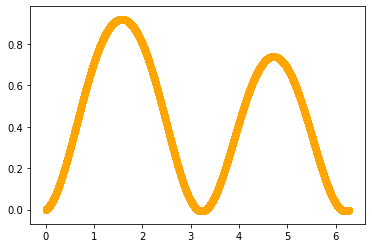

In [44]:
## Visualize the function I want to approximate keeping in mind that
## there is some random noise included

plt.scatter(X[:,1],y,color = 'orange')

I now build a Radial Basis Function by adding layers to our neural network and setting the activation functions to be sigmoids. Then fit the data using our training data and predict using the testing data.

In [45]:
## Build the Radial Basis Function Neural Network to approximate our function

model = Sequential()
model.add(Dense(12, input_dim=2, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(12, activation='tanh'))
model.add(Dense(8, activation='tanh'))
model.add(Dense(1, activation='tanh'))

Adadelta = optimizers.Adadelta(lr=1)

model.compile(loss='mse', optimizer=Adadelta)

model.fit(X_train,y_train,epochs=65)

predictions = model.predict(X_test)

Epoch 1/65
9000/9000 [==============================] - 1s 129us/step - loss: 0.0979
Epoch 2/65
9000/9000 [==============================] - 0s 43us/step - loss: 0.0689
Epoch 3/65
9000/9000 [==============================] - 0s 45us/step - loss: 0.0598
Epoch 4/65
9000/9000 [==============================] - 0s 43us/step - loss: 0.0543
Epoch 5/65
9000/9000 [==============================] - 0s 43us/step - loss: 0.0509
Epoch 6/65
9000/9000 [==============================] - 0s 42us/step - loss: 0.0487
Epoch 7/65
9000/9000 [==============================] - 0s 42us/step - loss: 0.0462
Epoch 8/65
9000/9000 [==============================] - 0s 44us/step - loss: 0.0419
Epoch 9/65
9000/9000 [==============================] - 0s 44us/step - loss: 0.0364
Epoch 10/65
9000/9000 [==============================] - 0s 44us/step - loss: 0.0321
Epoch 11/65
9000/9000 [==============================] - 0s 44us/step - loss: 0.0288
Epoch 12/65
9000/9000 [==============================] - 0s 47us/step - l

In [46]:
## Here we can calculate the Mean Squared Error and Root
## Mean Squared Error to better understand how our model is
## performing

## Low Root Mean Squared Error indicates the model is a good
## predictor 

MSE = mean_squared_error(y_test,predictions)

print("Root Mean Squared Error = ", math.sqrt(MSE))

Root Mean Squared Error =  0.1537358762284994


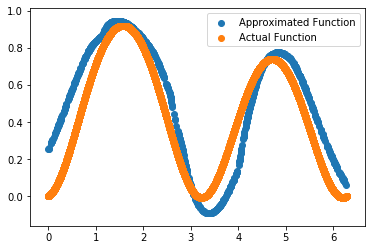

In [47]:
## Visualization of the model's performance

plt.scatter(X_test[:,1],predictions,label = "Approximated Function")
plt.scatter(X[:,1],y, label= "Actual Function")
plt.legend()